# Support Vector Machines

SVM is a popular algorithm for supervised learning typically used for **classification** problems, but also for **regression** problems.

Support Vector Machines are no machines in that sense. SVMs are a mathematical algorithm, the term "*machine*" refers to their origin in machine learning.

## How do SVMs work?

Having a set of binary (two classes) labeled training data, each data point is represented by a **vector** in a vector space. The task of the Support Vector Machine is to **fit a hyperplane** into this space, which acts as a **separator** of the two classes. The **distance** of those vectors that are closest to the hyperplane is **maximised**. This ensures that real data-points are classified as reliably as possible.

The position and orientation of the hyperplane only dependent on the vectors **closest** to it. These closest vectors are called **support vectors** (German: *Stützvektoren*) after their function and gave the Support Vector Machines their name.

Clean separation with a hyperplane is only possible if the data are **linearly separable**. This condition is generally not fulfilled for real training data. Support vector machines use the **kernel trick** to draw in a **non-linear class boundary**.

The kernel trick transfers the vector space, and thus also the training vectors, into a **higher-dimensional space**. In this higher-dimensional space, the separating hyperplane is now determined. When transformed back into the lower-dimensional space, the linear hyperplane becomes a non-linear which separates the training vectors into two classes.

Two problems arise in this process: The high transformation is enormously computationally intensive and the representation of the separation surface in low-dimensional space is generally incredibly complex and thus practically unusable. This is where the kernel trick comes in. If one uses suitable kernel functions for the description of the interface, which describe the hyperplane in the high-dimensional and nevertheless remain "benign" in the low-dimensional, it is possible to implement the outward and backward transformation without actually having to execute it computationally. Here, too, a part of the vectors, namely again the support vectors, is sufficient to completely describe the class boundary.

Both linear and non-linear support vector machines can be made more flexible by adding slack variables. The slack variables allow the classifier to misclassify individual objects, but at the same time "punish" any such misclassification. In this way, overfitting is avoided on the one hand and the required number of support vectors is reduced on the other.

## Types of SVMs

There are three different ways that SVMs can be implemented:

1. Maximum Margin Classifier
2. Classification with Inseparable Classes
3. Kernel Methods

### 1. Maximum Margin Classifier

When your data can be completely separated, the linear version of SVMs attempts to maximize the distance from the linear boundary to the closest points (called the **support vectors**)

### 2. Classification with Inseparable Classes

If data is not rarely completely separable, we use a **hyper-parameter** called **C**. The C hyper-parameter determines how flexible we are willing to be with the points that fall on the wrong side of our dividing boundary. 

The value of C ranges between 0 and infinity. 

* **Small C**: Large marign. May make classification errors.
* **Large C**: May have a small margin. Classifies points well.

Note: when **C is too large** for a particular set of data, you might **not** get **convergence** at all, because your data cannot be separated with the small number of errors allotted with such a large value of C.

### 3. Kernel Methods

Kernels in SVMs allow us the ability to separate data when the boundary between them is **nonlinear**. 

Typically, tere are two types of kernels:

* **polynomial**
* **rbf** (radial basis function)

The most popular kernel is the **rbf kernel**. The rbf kernel allows you the opportunity to classify points that seem hard to separate in any space. This is a density based approach that looks at the closeness of points to one another. This introduces another **hyper-parameter** $\gamma$. 

* **Large values of gamma** $\gamma$: the algorithm attempts to classify every point correctly.
* **small values of gamma** $\gamma$: try to cluster in a more general way that will make more mistakes, but may perform better with unseen data.

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

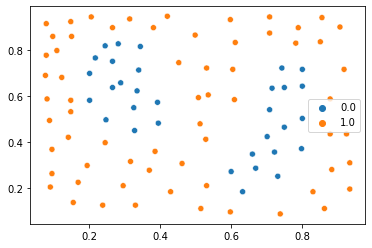

In [2]:
data = np.asarray(pd.read_csv('data/svm.csv', header=None))
X = data[:,0:2]
y = data[:,2]

import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

In [3]:
# Create the model and assign it to the variable model.
# Find the right parameters for this model to achieve 100% accuracy on the dataset.
model = SVC()

# Fit the model.
model.fit(X, y)

# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print(f'accurace score: {acc}')

accurace score: 0.8541666666666666


In [4]:
print(model.predict([ [0.2, 0.8], [0.5, 0.4] ]))

[1. 0.]


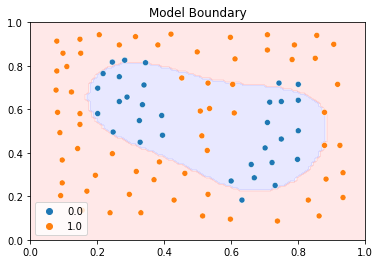

In [5]:
import matplotlib.pyplot as plt

px, py = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
vv = np.vstack([px.ravel(), py.ravel()]).T
pz = model.predict(vv).reshape(px.shape)
plt.contourf(px, py, pz, cmap='bwr', alpha=.1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);
plt.title('Model Boundary');

## Hyperparameters

When we define the `SVC` model (Support Vector Classifier) from the `sklearn.svm` package, we can specify **hyperparameters**:

* `C`: Regularization parameter. The strength of the regularization is inversely proportional to `C`.
* `kernel`: The kernel. The most common ones are **linear**, **poly**, and **rbf**.
* `degree`: If the kernel is **polynomial**, this is the maximum degree of the monomials in the kernel.
* `gamma` : If the kernel is **RBF**, this is the gamma parameter.


In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_params = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [100, 10, 1, 0.1, 0.01]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [1, 2, 3, 4]},
]

model = SVC()
cvmodel = GridSearchCV(model, model_params, cv = 10, verbose=1, scoring='accuracy')
cvmodel.fit(X, y)
# {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
print(cvmodel.best_params_)
print(cvmodel.best_score_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
{'C': 10, 'gamma': 100, 'kernel': 'rbf'}
0.8977777777777778


In [12]:
model = SVC(kernel='rbf', gamma=10, C=100)

# Fit the model.
model.fit(X, y)

# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print(f'accurace score: {acc}')

accurace score: 1.0


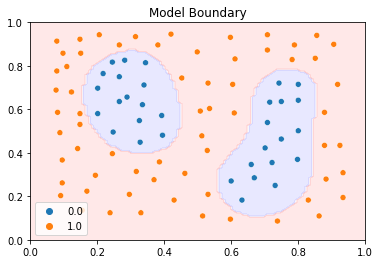

In [13]:
import matplotlib.pyplot as plt

px, py = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
vv = np.vstack([px.ravel(), py.ravel()]).T
pz = model.predict(vv).reshape(px.shape)
plt.contourf(px, py, pz, cmap='bwr', alpha=.1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);
plt.title('Model Boundary');